In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
plt.style.use('ggplot')

import nltk #natural language tool kit

In [2]:
df = pd.read_csv('Datasets/fake_or_real_news_with_sentiment.csv')

In [3]:
df.head()

,Unnamed: 0,title,text,label,sentiment
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,1
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,1
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,1
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1


In [4]:
print(df.shape)

(6335, 5)


In [18]:
df=df.drop(['Unnamed: 0'], axis = 1)

KeyError: "['Unnamed: 0'] not found in axis"

In [11]:
df['ID'] = range(1, len(df) + 1) #This creates a column titled ID, that starts at 1 and is the length of the DataFrame. 
first_column = df.pop('ID')
df.insert(0, 'ID', first_column) #This makes the newly created column the first in the dataframe.

In [12]:
df['text'].values[0]

'Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \r\nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. \r\nThe word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. \r\nBut that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. \r\nThe FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. \r\nThe FBI’s leadership is being warned that

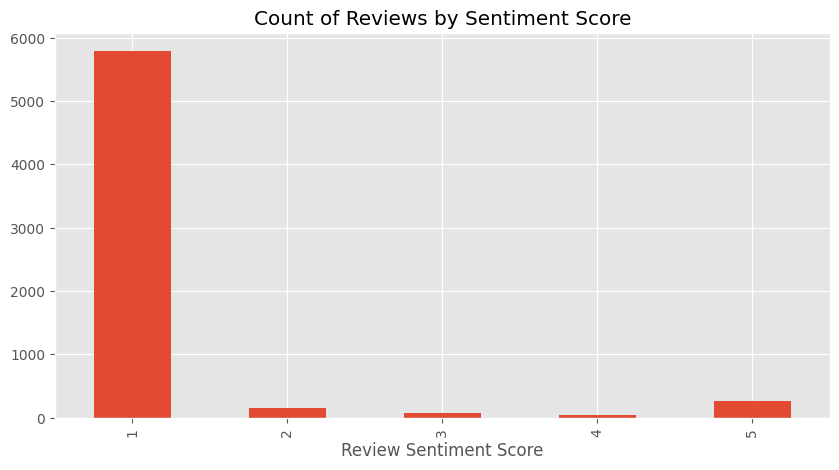

In [13]:
#This gives the number of times each score occurs 
ax = df['sentiment'].value_counts().sort_index() \
.plot(kind = 'bar', title = 'Count of Reviews by Sentiment Score',
figsize = (10,5))

ax.set_xlabel('Review Sentiment Score') 
plt.show()

In [14]:
#Removes null values
df.isnull().sum()

ID           0
title        0
text         0
label        0
sentiment    0
dtype: int64

In [15]:
df['text'] = df['text'].str.lower().str.replace('\\s+', ' ', regex=True).str.strip()

Some Basic NLTk

In [16]:
from nltk.corpus import stopwords

stop_words=set(stopwords.words("english"))
print(stop_words)

{'other', 'd', "wasn't", 'while', 'by', 'won', 'ours', 'above', 'up', "weren't", 'where', 'and', 'any', 'such', "didn't", 'hasn', 'all', 'ain', 'wasn', "you'll", "you've", 'i', 'mustn', 'as', 'which', 'being', 'each', 'so', 'again', 'had', 'will', 'needn', 'his', 'now', 'o', "should've", 'until', 'am', "wouldn't", "couldn't", 'own', 's', 't', 'how', 'yourself', 'then', 'themselves', 'theirs', 'not', 'about', 'before', 'there', 'during', 'has', 'doesn', 'hadn', 'same', 'why', 'this', "don't", "you're", 'of', 're', 'shouldn', 'too', 'myself', 'can', 'itself', "doesn't", 'few', 'you', "hasn't", 'hers', 'down', "shan't", "aren't", "it's", 'we', 'further', 'the', 'against', 'he', 'she', 'should', 'y', "shouldn't", 'her', "haven't", 'nor', 'be', 'it', "that'll", 'very', 'in', 'at', 'just', 'couldn', 'having', 'did', 'between', 'more', 'have', 'off', 'ourselves', 'him', 'some', 'me', "mustn't", 'with', 'aren', 'those', 'were', 'but', 've', 'once', 'both', 'doing', 'than', 'that', 'herself', '

In [24]:
df.head()

,ID,title,text,label,sentiment
0,1,You Can Smell Hillary’s Fear,"daniel greenfield, a shillman journalism fello...",FAKE,1
1,2,Watch The Exact Moment Paul Ryan Committed Pol...,google pinterest digg linkedin reddit stumbleu...,FAKE,1
2,3,Kerry to go to Paris in gesture of sympathy,u.s. secretary of state john f. kerry said mon...,REAL,1
3,4,Bernie supporters on Twitter erupt in anger ag...,"— kaydee king (@kaydeeking) november 9, 2016 t...",FAKE,1
4,5,The Battle of New York: Why This Primary Matters,it's primary day in new york and front-runners...,REAL,1


In [26]:
tokens = df['text'].apply(nltk.word_tokenize)

In [28]:
all_tokens = sum(tokens, [])

In [29]:
#Find the part of speech for each of these words
#Tags that determine what the words are for example 'cat' is a Noun(NN)
tags = nltk.pos_tag(all_tokens)

In [ ]:
# #Takes the tokens and group them into chunks of text
# entities  = nltk.chunk.ne_chunk(tags)
# entities.pprint()


Vader Model- Sentiment Analysis Model

-Vader Stands for Valence Aware Dictionary sEntiment Reasoner



-Using SentimentIntensityAnalyzer to get the neg/neu/pos scores of the texts.


*Bag of stopwords approach which means:
-Stop words are being removed.
-Each word is scored and combined to a total score.

Doesn't relate words like human speech 

In [31]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm #keeps track of loops

sia = SentimentIntensityAnalyzer()

In [32]:
#tester sentence
sia.polarity_scores('I love you!') 
#compound is just the average of neg, pos, neu scores
#has a range of +1 (pos) to -1 (neg)

{'neg': 0.0, 'neu': 0.182, 'pos': 0.818, 'compound': 0.6696}

In [33]:
#tester sentence
sia.polarity_scores('I hate my job.') 
#compound is just the average of neg, pos, neu scores
#has a range of +1 (pos) to -1 (neg)

{'neg': 0.649, 'neu': 0.351, 'pos': 0.0, 'compound': -0.5719}

In [34]:
#Run the polarity score on the entire dataset
#This is done with a simple loop
results = {}
for i, row in tqdm(df.iterrows()):
    texts = row['text']
    rowId = row['ID']
    results[rowId] = sia.polarity_scores(texts)

0it [00:00, ?it/s]

In [35]:
#Let Pandas take in a dictionary 
#results is a dictionary 
#.T orrientates the DataFrame
vader = pd.DataFrame(results).T
vader = vader.reset_index().rename(columns={'index': 'ID'})#renaming the column from index to ID
vader = vader.merge(df, how = 'left') #merging DataFrames to the left

In [36]:
#Sentiment Score and the Metadata
vader.head()

,ID,neg,neu,pos,compound,title,text,label,sentiment
0,1,0.181,0.732,0.087,-0.9994,You Can Smell Hillary’s Fear,"daniel greenfield, a shillman journalism fello...",FAKE,1
1,2,0.075,0.836,0.089,0.7723,Watch The Exact Moment Paul Ryan Committed Pol...,google pinterest digg linkedin reddit stumbleu...,FAKE,1
2,3,0.054,0.852,0.094,0.9595,Kerry to go to Paris in gesture of sympathy,u.s. secretary of state john f. kerry said mon...,REAL,1
3,4,0.085,0.835,0.081,-0.4242,Bernie supporters on Twitter erupt in anger ag...,"— kaydee king (@kaydeeking) november 9, 2016 t...",FAKE,1
4,5,0.082,0.743,0.175,0.9903,The Battle of New York: Why This Primary Matters,it's primary day in new york and front-runners...,REAL,1


Plotting the Vader results

<function matplotlib.pyplot.show(close=None, block=None)>

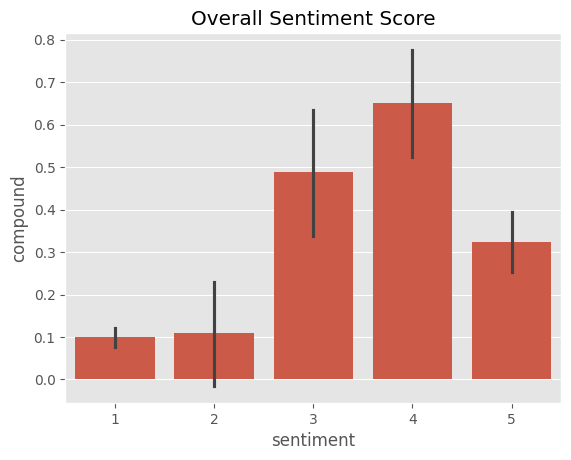

In [37]:
ax = sns.barplot(data=vader, x= 'sentiment', y='compound')
ax.set_title('Overall Sentiment Score')
plt.show
#compound score

<function matplotlib.pyplot.show(close=None, block=None)>

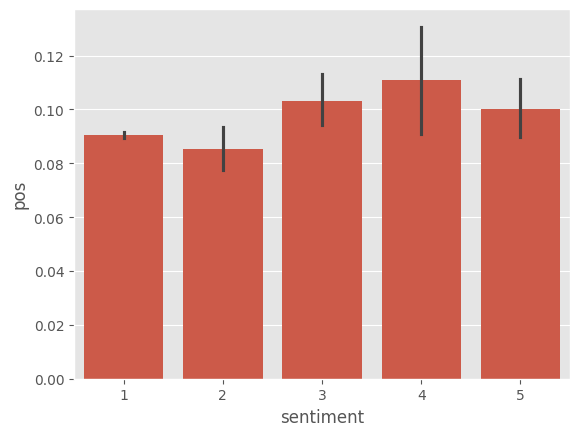

In [38]:
sns.barplot(data=vader, x = 'sentiment', y = 'pos')
plt.show
#for the positive score

<function matplotlib.pyplot.show(close=None, block=None)>

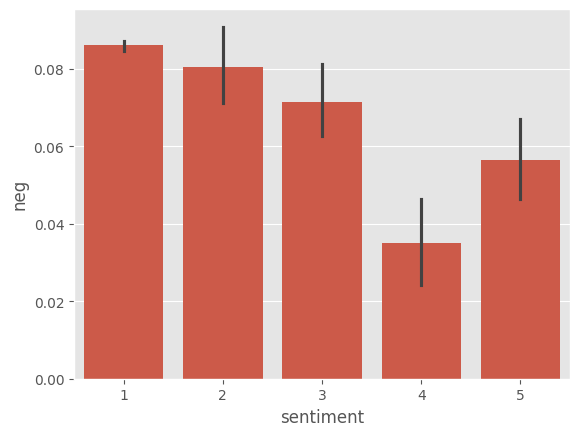

In [39]:
sns.barplot(data=vader, x = 'sentiment', y = 'neg')
plt.show
#for the negative score

<function matplotlib.pyplot.show(close=None, block=None)>

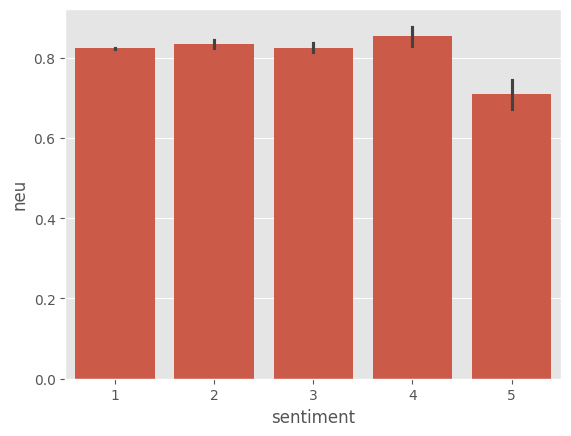

In [40]:
sns.barplot(data=vader, x = 'sentiment', y = 'neu')
plt.show
#for the neutral score

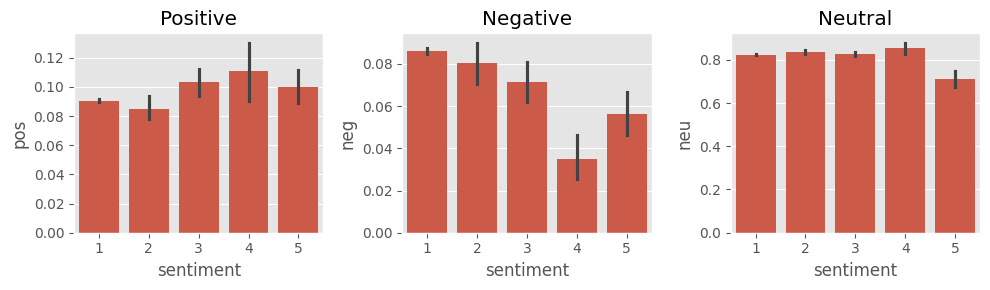

In [42]:
fig, ax = plt.subplots(1, 3, figsize = (10, 3))
sns.barplot(data=vader, x = 'sentiment', y = 'pos', ax=ax[0])
sns.barplot(data=vader, x = 'sentiment', y = 'neg', ax=ax[1])
sns.barplot(data=vader, x = 'sentiment', y = 'neu', ax=ax[2])
ax[0].set_title('Positive')
ax[1].set_title('Negative')
ax[2].set_title('Neutral')
plt.tight_layout() #To fix the overlapping of the three diagrams
plt.show()
#Positivity gets higher as the score goes higher
#The Neutral stays at a Neutral level 
#Negativity gets lower as the score goes lower

Vader is good for relating the Sentiment from the dataset to the sentiment Analyser score?

Vader scored each word indidually an did not relate each word to each other (context) such as negative words being sarcastic. Won't pick up the context of the words.

Building the Model 

In [68]:
vader.head()

,ID,neg,neu,pos,compound,title,text,label,sentiment,combined_text
0,1,0.181,0.732,0.087,-0.9994,6155,1378,0,1,You Can Smell Hillary’s Fear daniel greenfield...
1,2,0.075,0.836,0.089,0.7723,5747,2080,0,1,Watch The Exact Moment Paul Ryan Committed Pol...
2,3,0.054,0.852,0.094,0.9595,2946,5289,1,1,Kerry to go to Paris in gesture of sympathy u....
3,4,0.085,0.835,0.081,-0.4242,653,5987,0,1,Bernie supporters on Twitter erupt in anger ag...
4,5,0.082,0.743,0.175,0.9903,4788,2705,1,1,The Battle of New York: Why This Primary Matte...


In [75]:

from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

# Assuming 'X' is your feature matrix and 'y' is your target variable

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the CatBoost classifier
catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.1, random_seed=42)
catboost_model.fit(X_train, y_train, cat_features=[0,1,2,3,8])  # Assuming the first three columns are categorical

# Making predictions
predictions = catboost_model.predict(X_test)


CatBoostError: Invalid type for cat_feature[non-default value idx=0,feature_idx=0]=0.097 : cat_features must be integer or string, real number values and NaN values should be converted to string.

In [65]:

X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
vm = LinearDiscriminantAnalysis().fit(X_train,y_train)
predictions = vm.predict(X_test)

ValueError: could not convert string to float: 'Alabama Sen. Sessions Backs Trump’s Immigration Platform donald trump received a key endorsement for his immigration platform: sen. jeff sessions, one of the strongest proponents in congress of restricting immigration.'

In [74]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       628
           1       1.00      1.00      1.00       639

    accuracy                           1.00      1267
   macro avg       1.00      1.00      1.00      1267
weighted avg       1.00      1.00      1.00      1267



In [ ]:
columns = ['ID', 'neg', 'neu','pos','text','sentiment',]
columns_final = df[columns]
X_train , X_test, y_train, y_test = train_test_split(vader).final.drop(['ID'], axis=1), columns_final.Label, test_size=0.2, random_state
vm = LinearDiscriminantAnalysis().fit(X_train, y_train)
predictions = vm.predict(X_test)
print(classification_report(y_test,predictions))